# Setup

## Libs

In [191]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
 
seaborn.set_style("white") # change le style par défaut des graphiques seaborn
%matplotlib inline

## Load file

In [192]:
df = pd.read_csv("data/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Clean (i hope)

### Clean Yes/No to 1/0

In [193]:
column_to_change = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
d = dict()
for c in column_to_change:
    d[c] = {"No": 0, "Yes": 1, "No, borderline diabetes": 0, "Yes (during pregnancy)": 0}
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


### Change categoricals columns

In [194]:
heart_orig = df

In [195]:
# We can find 4 more categorical variables which are not yes/no. The dtype is object for these 4. Let us convert them into dummy variables.
categoricals = df.select_dtypes(include=['object'])
categoricals.head()
cat_dummies = pd.get_dummies(categoricals)
cat_dummies.head()
# Drop the redundant columns
df.drop(list(categoricals.columns), axis=1, inplace=True)
# concat the heart and dummies data frames.
df = pd.concat([df, cat_dummies], axis=1)

In [196]:
df.head(100)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,19.49,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
96,0,24.02,0,0,0,0.0,14.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
97,0,28.35,1,0,0,20.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
98,0,24.37,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


# Analyse

## Correlation

### With categorical data splitted

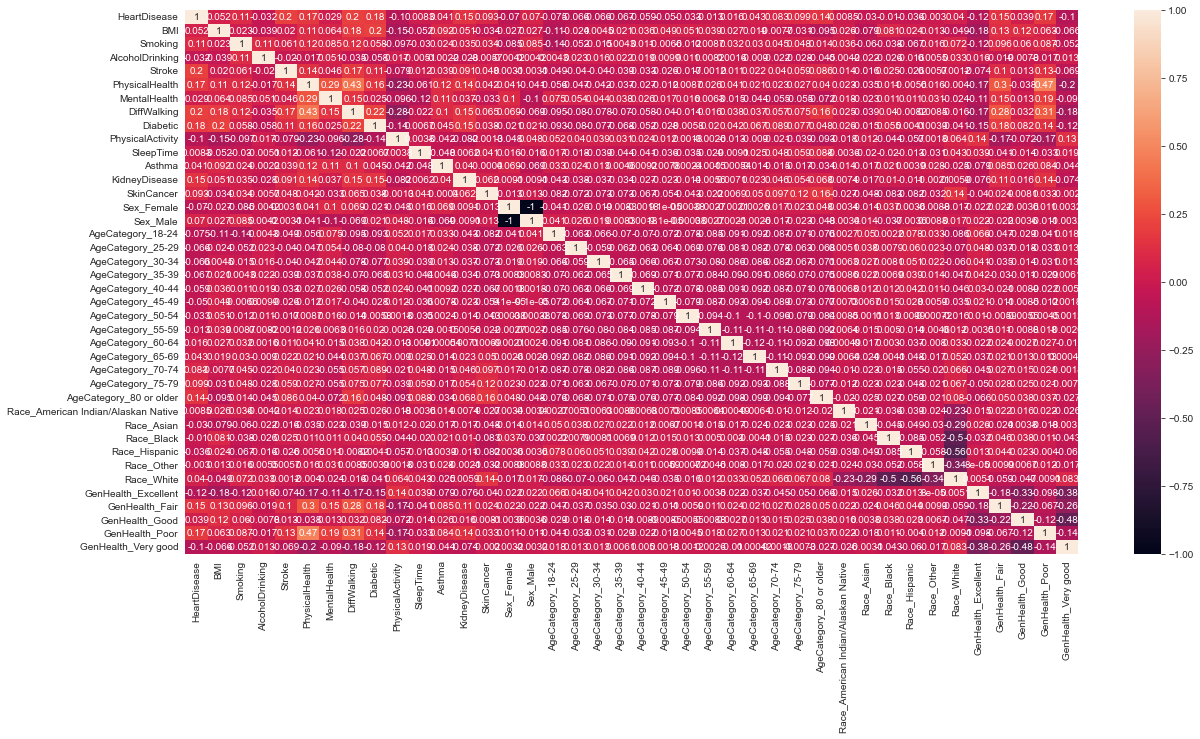

In [197]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Without categorical data

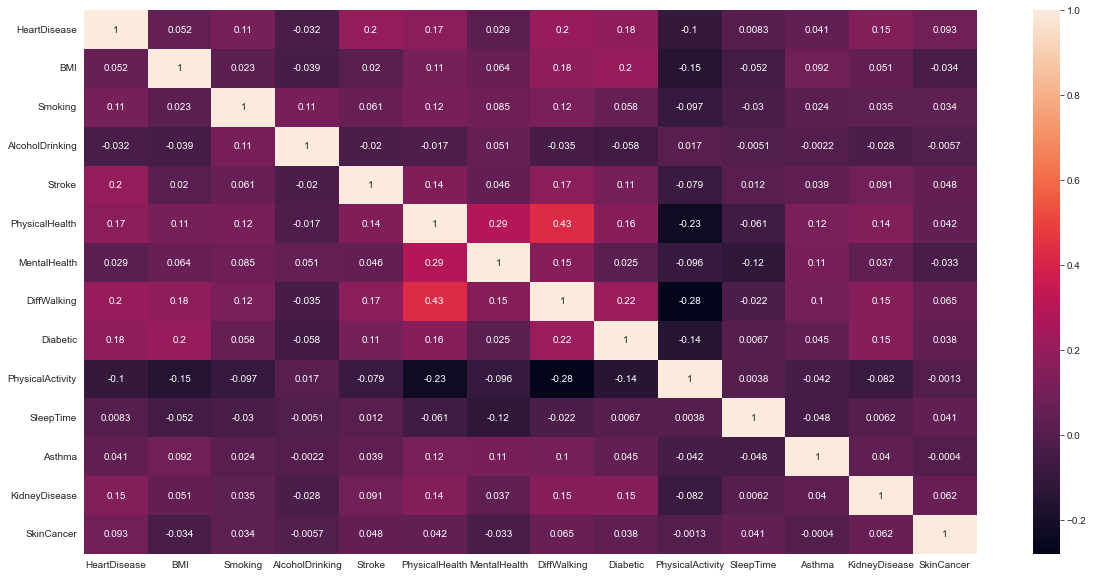

In [198]:
plt.figure(figsize = (20,10))
sns.heatmap(heart_orig.corr(),annot = True)
plt.show()

# Setup for models

## Splitting dataset

In [199]:
# Here we are interested in the chance of having the heart disease based on other variables.
# Let y be HeartDisease column
y = df.pop('HeartDisease')
X = df
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,1,1,5.0,...,0,0,0,0,1,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,1,8.0,...,0,0,0,0,1,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,6.0,...,0,0,0,0,1,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,0,1,8.0,...,0,0,0,0,1,0,0,0,0,1


In [200]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
148821,25.10,0,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,0,0,1,0,0
113787,23.03,1,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,1,0,0,0,0
114251,27.17,1,0,0,0.0,0.0,0,0,1,5.0,...,0,0,1,0,0,1,0,0,0,0
311048,23.33,0,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,0,0,1,0,0
50914,28.89,0,0,0,0.0,0.0,0,1,0,8.0,...,0,0,0,0,1,0,0,1,0,0


In [201]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
148821,25.10,0,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,0,0,1,0,0
113787,23.03,1,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,1,0,0,0,0
114251,27.17,1,0,0,0.0,0.0,0,0,1,5.0,...,0,0,1,0,0,1,0,0,0,0
311048,23.33,0,0,0,0.0,0.0,0,0,1,7.0,...,0,0,0,0,1,0,0,1,0,0
50914,28.89,0,0,0,0.0,0.0,0,1,0,8.0,...,0,0,0,0,1,0,0,1,0,0


# not optimized models

## XGBoost Classifier with Bagging and Boosting

In [202]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


# Init classifier
xgb_cl = xgb.XGBClassifier()

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

Train score: 0.9147577013794582
Test score: 0.9135805042787605


0.9138932029727223

In [203]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# The base learner will be a decision tree with depth = 2
xgb_cl = xgb.XGBClassifier()

adaboost = AdaBoostClassifier(base_estimator=xgb_cl, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(X_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Train score: 0.9147577013794582
Test score: 0.9135805042787605
Accuracy: 0.9138932029727223


## Decision Tree Classifier with Bagging and Boosting

In [204]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.9131539918519048
Test score: 0.912225476604926
Accuracy: 0.9140703988993006


In [205]:
from sklearn.ensemble import AdaBoostClassifier

# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)


adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(X_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.9147577013794582
Test score: 0.9135805042787605
Accuracy: 0.9135805042787605


## Naive Bayes Classifier

In [206]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7128383660450911


## Logistic Regression

In [207]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9149772251117898


c:\Users\darkr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K Neighbours Classifier

In [208]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

## Which models are promising?